In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

In [42]:
df=yf.download('TSLA',start='2022-11-01')

[*********************100%%**********************]  1 of 1 completed


In [43]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800
2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300
2022-11-03,211.360001,221.199997,210.139999,215.309998,215.309998,56538800
2022-11-04,222.600006,223.800003,203.080002,207.470001,207.470001,98622200
2022-11-07,208.649994,208.899994,196.660004,197.080002,197.080002,93916500
...,...,...,...,...,...,...
2024-05-06,183.800003,187.559998,182.199997,184.759995,184.759995,84390300
2024-05-07,182.399994,183.259995,177.399994,177.809998,177.809998,75045900
2024-05-08,171.589996,176.059998,170.149994,174.720001,174.720001,79969500


In [44]:
def MACD(df):
    df['EMA12']= df.Close.ewm(span=12).mean()
    df['EMA26']= df.Close.ewm(span=26).mean()
    df['MACD']= df.EMA12-df.EMA26
    df['signal']=df.MACD.ewm(span=9).mean()
    print('indicator addded')

In [45]:
MACD(df)

indicator addded


In [46]:
df

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,signal
Date,,,,,,,,,,
2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800,227.820007,227.820007,0.000000,0.000000
2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300,220.865001,221.153078,-0.288077,-0.160043
2022-11-03,211.360001,221.199997,210.139999,215.309998,215.309998,56538800,218.696882,219.053716,-0.356834,-0.240695
2022-11-04,222.600006,223.800003,203.080002,207.470001,207.470001,98622200,215.152994,215.815416,-0.662421,-0.383556
2022-11-07,208.649994,208.899994,196.660004,197.080002,197.080002,93916500,210.242627,211.470596,-1.227969,-0.634750
...,...,...,...,...,...,...,...,...,...,...
2024-05-06,183.800003,187.559998,182.199997,184.759995,184.759995,84390300,174.977715,172.125174,2.852541,-0.570672
2024-05-07,182.399994,183.259995,177.399994,177.809998,177.809998,75045900,175.413451,172.546272,2.867179,0.116898
2024-05-08,171.589996,176.059998,170.149994,174.720001,174.720001,79969500,175.306766,172.707289,2.599478,0.613414


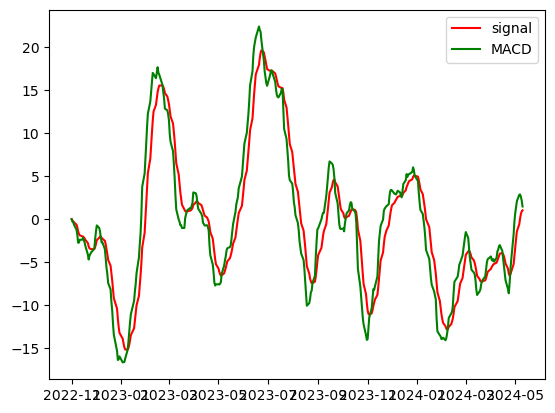

In [47]:
plt.plot(df.signal,label='signal',color='red')
plt.plot(df.MACD,label='MACD',color='green')
plt.legend()
plt.show()

In [48]:
Buy,Sell=[],[]

for i in range(2,len(df)):
    if df.MACD.iloc[i] > df.signal.iloc[i] and df.MACD.iloc[i-1] < df.signal.iloc[i-1]:
        Buy.append(i)
    elif df.MACD.iloc[i] < df.signal.iloc[i] and df.MACD.iloc[i-1] > df.signal.iloc[i-1]:
        Sell.append(i)

In [49]:
Buy

[19, 47, 97, 127, 167, 204, 232, 254, 281, 318, 347, 371]

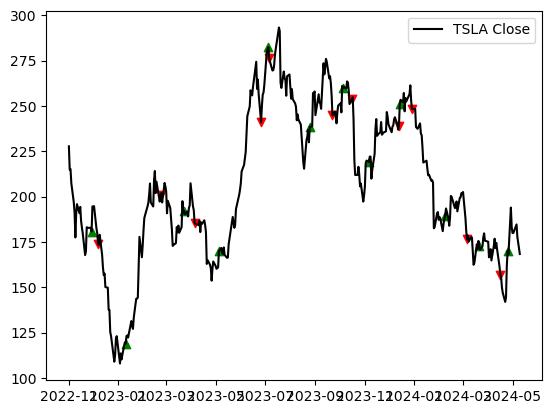

In [50]:
plt.scatter(df.iloc[Buy].index,df.iloc[Buy].Close,marker="^",color='green')
plt.scatter(df.iloc[Sell].index,df.iloc[Sell].Close,marker='v',color='red')
plt.plot(df.Close,label='TSLA Close',color='k')
plt.legend()
plt.show()

## Backtesting

In [51]:
Buy

[19, 47, 97, 127, 167, 204, 232, 254, 281, 318, 347, 371]

In [52]:
Realbuys=[i+1 for i in Buy]
Realsells= [i+1 for i in Sell]

In [53]:
Buyprices=df.Open.iloc[Realbuys]
Sellprices=df.Open.iloc[Realsells]

In [54]:
Buyprices


Date
2022-11-30    182.429993
2023-01-11    122.089996
2023-03-24    191.649994
2023-05-08    173.720001
2023-07-06    278.089996
2023-08-28    242.580002
2023-10-06    253.979996
2023-11-07    219.979996
2023-12-15    251.210007
2024-02-09    190.179993
2024-03-22    166.690002
2024-04-26    168.850006
Name: Open, dtype: float64

In [55]:
if Sellprices.index[0] < Buyprices.index[0]:
    Sellprices=Sellprices.drop(Sellprices.index[0])
elif Buyprices.index[-1] > Sellprices.index[-1]:
    Buyprices= Buyprices.drop(Buyprices.index[-1])

In [56]:
profitsrel=[]

for i in range(len(Sellprices)):
    profitsrel.append((Sellprices[i]-Buyprices[i])/Buyprices[i])

In [57]:
profitsrel

[-0.056076282071227425,
 0.6701614364683695,
 -0.04471689192987183,
 0.40018422624887634,
 0.0012226126159443566,
 0.003297893666910664,
 -0.015276752851770877,
 0.09655425904940614,
 -0.004498247890656666,
 -0.08323686603171017,
 -0.05429241657692704]

In [58]:
sum(profitsrel)/len(profitsrel)

0.08302936097248573

In [59]:
import pandas as pd

pd.DataFrame(profitsrel).mean()

0    0.083029
dtype: float64